In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

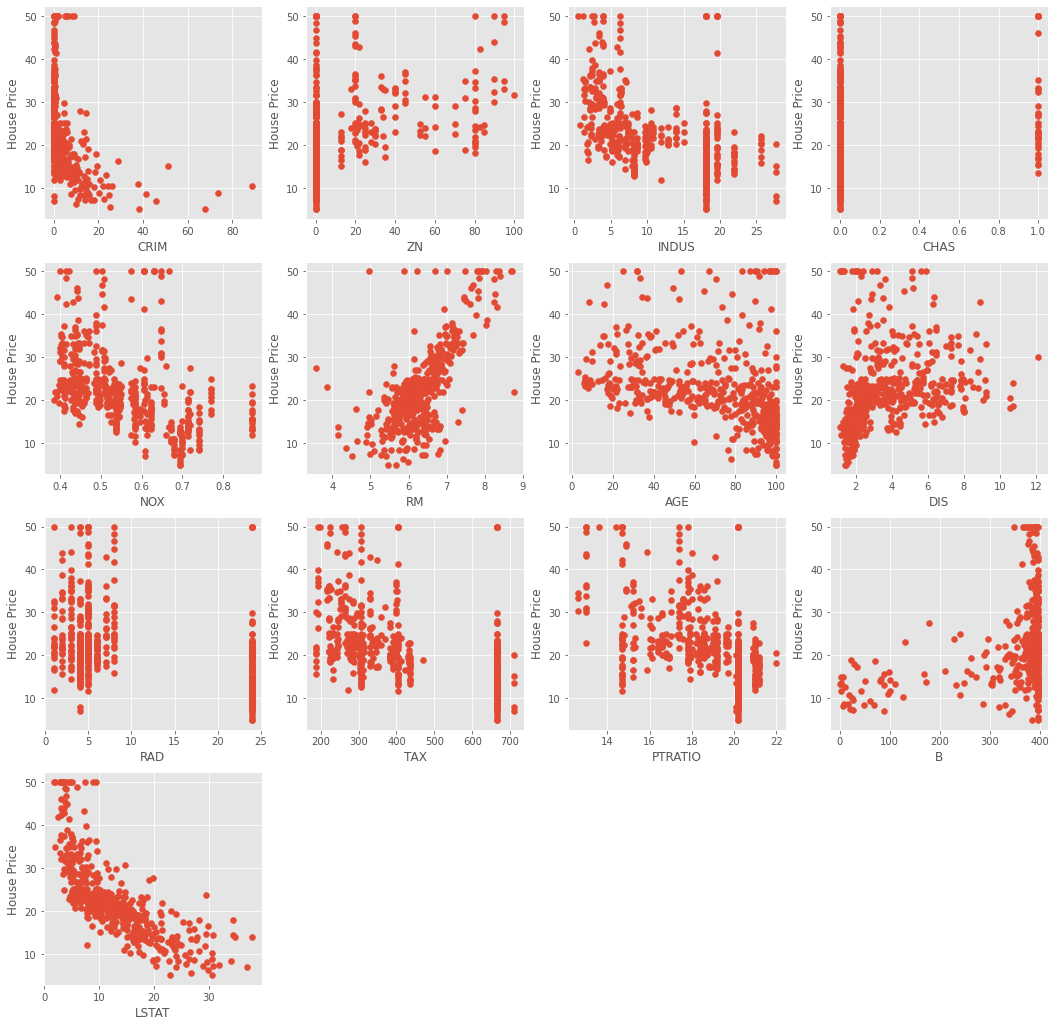

In [14]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(boston_dataset.feature_names):
	ax = fig.add_subplot(4, 4, index + 1)
	ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
	ax.set_ylabel('House Price', size = 12)
	ax.set_xlabel(feature_name, size = 12)

plt.show()


In [16]:
# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)
 
# input
X = boston_pd.iloc[:, :-1]
 
#output
Y = boston_pd.iloc[:, -1]
 
print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  House Price
0  0.00632  18.0   2.31   0.0  ...     15.3  396.90   4.98         24.0
1  0.02731   0.0   7.07   0.0  ...     17.8  396.90   9.14         21.6
2  0.02729   0.0   7.07   0.0  ...     17.8  392.83   4.03         34.7
3  0.03237   0.0   2.18   0.0  ...     18.7  394.63   2.94         33.4
4  0.06905   0.0   2.18   0.0  ...     18.7  396.90   5.33         36.2

[5 rows x 14 columns]


In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
    test_size = 0.25)
 
print("Train data shape of X = % s and Y = % s : "%(
    x_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(
    x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [18]:
# evaluate an elastic net model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.682 (0.530)


In [19]:
# make a prediction with an elastic net model on the dataset
from pandas import read_csv
from sklearn.linear_model import ElasticNet
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
# fit model
model.fit(X, y)
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 31.047


In [20]:
# grid search hyperparameters for the elastic net
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.378
Config: {'alpha': 0.01, 'l1_ratio': 0.97}


In [ ]:
# use automatically configured elastic net algorithm
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

alpha: 0.000000

l1_ratio_: 0.470000

You might see some warnings that can be safely ignored, such as:
Objective did not converge. You might want to increase the number of iterations.